# March Madness Analysis

Overview:

In this project, we will predict the number of wins (play in games are not included in this win total) for each team in the Men's NCAA March Madness tournament by using regular season statistics.

Steps:

1. Scrape regular season statistics and tournament win totals from www.sports-reference.com.
2. Randomly split the data in to 80/20 training and testing set.
3. Run the data with logistic regression and random forest models.
4. Determine feature importance by using the extra trees classifier.

In [40]:
# Scrape regular season statistics and tournament win totals from www.sports-reference.com.
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import pandas as pd
from IPython.display import display

teams = []
allData = []
year = range(2010, 2018)

for i in year:
    html = urlopen("https://www.sports-reference.com/cbb/postseason/"+str(i)+"-ncaa.html")
    bsObj = BeautifulSoup(html, "html.parser")

    region = []
    if i == 2011:
        region = ['east', 'southeast', 'southwest', 'west']
    else:
        region = ['midwest', 'west', 'south', 'east']

    for j in region:
        teams += bsObj.find("div", {"id":j}).findAll("a", href=re.compile("\/cbb\/schools\/"))
    teams = list(set(teams))

for i in range(len(teams)):
    link = teams[i]['href']
    teamPage = urlopen('https://www.sports-reference.com'+link)
    teamObj = BeautifulSoup(teamPage, "html.parser")
    foundWon = re.findall('Won', str(teamObj))

    tourneyWins = 0

    for i in foundWon:
        tourneyWins += 1

    teamTable = teamObj.find('table', {'id':'team_stats'})
    teamName = link[13:-10].replace('-', ' ').title()
    year = link[-9:-5]
    ncaaFirst = teamObj.body.find(text=re.compile('seed in'))
    seed = int(ncaaFirst[3:ncaaFirst.find(' ')])

    if seed == 16 and tourneyWins != 0:
        totalWins = tourneyWins - 1
    
    region = ncaaFirst[ncaaFirst.rfind(' ')+1:-1]

    teamFgM = teamTable.find('td', {'data-stat':'fg'}).text
    teamFgA = teamTable.find('td', {'data-stat':'fga'}).text
    teamFgPct = teamTable.find('td', {'data-stat':'fg_pct'}).text
    teamFg2M = teamTable.find('td', {'data-stat':'fg2'}).text
    teamFg2A = teamTable.find('td', {'data-stat':'fg2a'}).text
    teamFg2Pct = teamTable.find('td', {'data-stat':'fg2_pct'}).text
    teamFg3M = teamTable.find('td', {'data-stat':'fg3'}).text
    teamFg3A = teamTable.find('td', {'data-stat':'fg3a'}).text
    teamFg3Pct = teamTable.find('td', {'data-stat':'fg3_pct'}).text
    teamFtM = teamTable.find('td', {'data-stat':'ft'}).text
    teamFtA = teamTable.find('td', {'data-stat':'fta'}).text
    teamFtPct = teamTable.find('td', {'data-stat':'ft_pct'}).text
    teamORb = teamTable.find('td', {'data-stat':'orb'}).text
    teamDRb = teamTable.find('td', {'data-stat':'drb'}).text
    teamTRb = teamTable.find('td', {'data-stat':'trb'}).text
    teamAst = teamTable.find('td', {'data-stat':'ast'}).text
    teamStl = teamTable.find('td', {'data-stat':'stl'}).text
    teamBlk = teamTable.find('td', {'data-stat':'blk'}).text
    teamTov = teamTable.find('td', {'data-stat':'tov'}).text
    teamPf = teamTable.find('td', {'data-stat':'pf'}).text
    teamPts = teamTable.find('td', {'data-stat':'pts'}).text
    teamPtPG = teamTable.find('td', {'data-stat':'pts_per_g'}).text

    oppFgM = teamTable.find('td', {'data-stat':'opp_fg'}).text
    oppFgA = teamTable.find('td', {'data-stat':'opp_fga'}).text
    oppFgPct = teamTable.find('td', {'data-stat':'opp_fg_pct'}).text
    oppFg2M = teamTable.find('td', {'data-stat':'opp_fg2'}).text
    oppFg2A = teamTable.find('td', {'data-stat':'opp_fg2a'}).text
    oppFg2Pct = teamTable.find('td', {'data-stat':'opp_fg2_pct'}).text
    oppFg3M = teamTable.find('td', {'data-stat':'opp_fg3'}).text
    oppFg3A = teamTable.find('td', {'data-stat':'opp_fg3a'}).text
    oppFg3Pct = teamTable.find('td', {'data-stat':'opp_fg3_pct'}).text
    oppFtM = teamTable.find('td', {'data-stat':'opp_ft'}).text
    oppFtA = teamTable.find('td', {'data-stat':'opp_fta'}).text
    oppFtPct = teamTable.find('td', {'data-stat':'opp_ft_pct'}).text
    oppORb = teamTable.find('td', {'data-stat':'opp_orb'}).text
    oppDRb = teamTable.find('td', {'data-stat':'opp_drb'}).text
    oppTRb = teamTable.find('td', {'data-stat':'opp_trb'}).text
    oppAst = teamTable.find('td', {'data-stat':'opp_ast'}).text
    oppStl = teamTable.find('td', {'data-stat':'opp_stl'}).text
    oppBlk = teamTable.find('td', {'data-stat':'opp_blk'}).text
    oppTov = teamTable.find('td', {'data-stat':'opp_tov'}).text
    oppPf = teamTable.find('td', {'data-stat':'opp_pf'}).text
    oppPts = teamTable.find('td', {'data-stat':'opp_pts'}).text
    oppPtPG = teamTable.find('td', {'data-stat':'opp_pts_per_g'}).text
    
    insertColumn = [
        {'name': teamName, 'year': year, 'seed': seed, 'region': region, 'tourneyWins': tourneyWins,
          'teamFgM': teamFgM, 'teamFgA': teamFgA, 'teamFgPct': teamFgPct, 'teamFg2M': teamFg2M, 'teamFg2A': teamFg2A, 'teamFg2Pct': teamFg2Pct,
          'teamFg3M': teamFg3M, 'teamFg3A': teamFg3A, 'teamFg3Pct': teamFg3Pct, 'teamFtM': teamFtM, 'teamFtA': teamFtA, 'teamFtPct': teamFtPct,
          'teamORb': teamORb, 'teamDRb': teamDRb, 'teamTRb': teamTRb, 'teamAst': teamAst, 'teamStl': teamStl, 'teamBlk': teamBlk, 'teamTov': teamTov,
          'teamPf': teamPf, 'teamPts': teamPts, 'teamPtPG': teamPtPG,

         'oppFgM': oppFgM, 'oppFgA': oppFgA, 'oppFgPct': oppFgPct, 'oppFg2M': oppFg2M, 'oppFg2A': oppFg2A, 'oppFg2Pct': oppFg2Pct,
          'oppFg3M': oppFg3M, 'oppFg3A': oppFg3A, 'oppFg3Pct': oppFg3Pct, 'oppFtM': oppFtM, 'oppFtA': oppFtA, 'oppFtPct': oppFtPct,
          'oppORb': oppORb, 'oppDRb': oppDRb, 'oppTRb': oppTRb, 'oppAst': oppAst, 'oppStl': oppStl, 'oppBlk': oppBlk, 'oppTov': oppTov,
          'oppPf': oppPf, 'oppPts': oppPts, 'oppPtPG': oppPtPG,}
    ]
    allData.extend(insertColumn) 

allDataPd = pd.DataFrame(allData)
display(allDataPd.head())




,name,oppAst,oppBlk,oppDRb,oppFg2A,oppFg2M,oppFg2Pct,oppFg3A,oppFg3M,oppFg3Pct,...,teamFtPct,teamORb,teamPf,teamPtPG,teamPts,teamStl,teamTRb,teamTov,tourneyWins,year
0,Virginia Tech,450,129,787,1301,638,.490,728,264,.363,...,.737,240,543,79.1,2610,131,1068,398,0,2017
1,Ucla,499,120,862,1264,574,.454,790,281,.356,...,.676,440,645,71.9,2590,238,1367,430,2,2015
2,Missouri,376,113,719,1311,578,.441,704,234,.332,...,.744,454,567,76.1,2588,229,1266,442,0,2013
3,Louisville,395,92,813,1296,563,.434,639,199,.311,...,.663,434,671,74.9,2623,327,1272,459,0,2011
4,Texas El Paso,378,78,794,1177,511,.434,627,196,.313,...,.673,323,643,75.3,2484,288,1193,435,0,2010


We added advanced stats like PER (a stat designed for individual players translated to describe team performance), VOP (value of possesion, EFG (effective field goal percentage), TOV (turnover per possesion), defRb (defensive rebound percentage), offRb (offensive rebound percentage), and ftAFgA (free throw per field goal attempt).

In [70]:
allDataPd['factor'] = (2/3) - ( ((.5 * allDataPd['teamAst'])/allDataPd['teamFgM']) 
/ ((2 * allDataPd['teamFgM'])/allDataPd['teamFtM']))
allDataPd['VOP'] = allDataPd['teamPtPG'] / (allDataPd['teamFgA'] - allDataPd['teamORb'] + allDataPd['teamTov'] + .44*allDataPd['teamFtA'])
allDataPd['DRB'] = allDataPd['teamDRb']/allDataPd['teamTRb']
allDataPd['uPER']  =  (1  /  40)  *  (  allDataPd['teamFg3M']  +  (2/3)  *  allDataPd['teamAst']  +  (2 -allDataPd['factor']*  (allDataPd['teamAst']  / allDataPd['teamFgM'])) * allDataPd['teamFgM']
                    + (allDataPd['teamFtM'] *0.5 * (1 + (1 -(allDataPd['teamAst'] / allDataPd['teamFgM'])) + (2/3) * (allDataPd['teamAst'] / allDataPd['teamFgM']))) 
                   - allDataPd['VOP'] * allDataPd['teamTov'] -allDataPd['VOP'] * allDataPd['VOP'] * (allDataPd['teamFgA'] -allDataPd['teamFgM'] )   
                   -allDataPd['VOP'] * 0.44 * (0.44 + (0.56 * allDataPd['DRB'])) * (allDataPd['teamFtA']-allDataPd['teamFtA'])         
                    + allDataPd['VOP'] * (1 -allDataPd['DRB']) * (allDataPd['teamTRb'] -allDataPd['teamORb']) + allDataPd['VOP'] * allDataPd['DRB'] * allDataPd['teamORb'] + allDataPd['VOP'] *allDataPd['teamStl']
                   + allDataPd['VOP'] * allDataPd['DRB'] * allDataPd['teamBlk'] -allDataPd['teamPf'] * ((allDataPd['teamFtM'] / allDataPd['teamPf']) -0.44 * (allDataPd['teamFtA'] / allDataPd['teamPf']) * allDataPd['VOP'])                  )
allDataPd['EFG'] = (allDataPd['teamFg2M'] + 1.5*allDataPd['teamFg3M'])/allDataPd['teamFgA']
allDataPd['TOV'] = allDataPd['teamTov']/(allDataPd['teamFgA'] + .44*allDataPd['teamFtA']+allDataPd['teamTov'])
allDataPd['offRb'] = allDataPd['teamORb']/(allDataPd['teamORb'] +allDataPd['oppDRb'])
allDataPd['defRb'] = allDataPd['teamDRb']/(allDataPd['teamDRb'] +allDataPd['oppORb'])
allDataPd['ftAFgA'] = allDataPd['teamFtA']/allDataPd['teamFgA']
allDataPd['PER'] = (allDataPd['uPER'] * 2 * allDataPd['teamPtPG']) / (allDataPd['teamPtPG'] + allDataPd['oppPtPG'])
display(allDataPd.head())

,name,oppAst,oppBlk,oppDRb,oppFg2A,oppFg2M,oppFg2Pct,oppFg3A,oppFg3M,oppFg3Pct,...,factor,VOP,DRB,uPER,EFG,TOV,offRb,defRb,ftAFgA,PER
0,Hampton,336.0,105.0,868.0,1307.0,539.0,0.412,567.0,180.0,0.317,...,0.581133,0.029974,0.686325,42.959174,0.462561,0.159137,0.297166,0.641374,0.411829,44.254927
1,Missouri,382.0,105.0,830.0,1306.0,590.0,0.452,584.0,185.0,0.317,...,0.587984,0.032086,0.632500,53.263892,0.501426,0.151570,0.346971,0.618582,0.339354,57.383957
2,Duke,438.0,105.0,826.0,1669.0,720.0,0.431,543.0,176.0,0.324,...,0.590613,0.031473,0.681201,59.644515,0.537398,0.148188,0.350629,0.668303,0.374433,66.280786
3,Milwaukee,415.0,132.0,868.0,1334.0,665.0,0.499,657.0,204.0,0.311,...,0.556573,0.029628,0.709814,46.803155,0.492850,0.172482,0.283237,0.692244,0.435911,46.769938
4,Louisville,424.0,99.0,856.0,1335.0,578.0,0.433,623.0,189.0,0.303,...,0.594785,0.029356,0.663953,49.225891,0.477051,0.145482,0.346565,0.691596,0.386719,52.742026


In [80]:
#Randomly split the data in to 80/20 training and testing set.
from sklearn.model_selection import train_test_split

allDataPdLinear = allDataPd[allDataPd.columns.difference(['name', 'region', 'tourneyWins'])]
X_train, X_test, y_train, y_test = train_test_split(allDataPdLinear, allDataPd.tourneyWins, test_size=0.2, random_state=4)


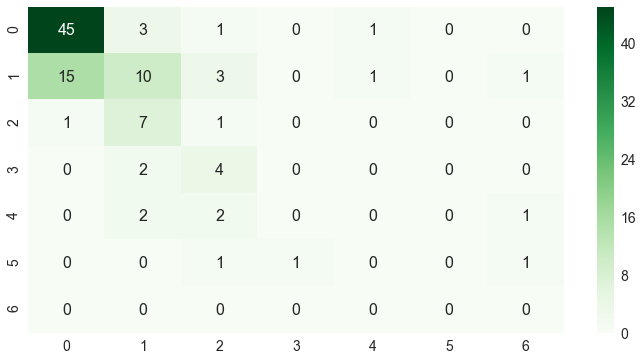

Accuracy: 0.543689320388


In [81]:
# Run logistic Regression
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn

LogReg = linear_model.LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

# Plot Confusion Matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(7), range(7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cmap="Greens")# font size
plt.show()

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))

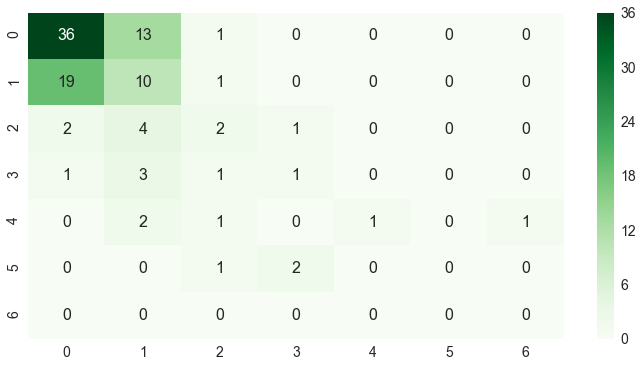

Accuracy: 0.485436893204


In [82]:
# Run random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Plot Confusion Matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(7), range(7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cmap="Greens")# font size
plt.show()

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))

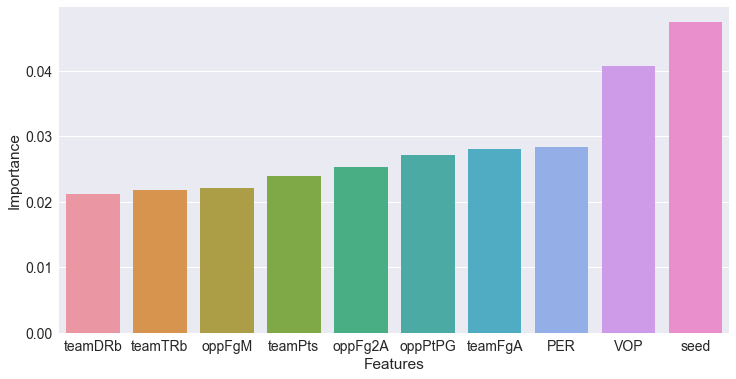

In [83]:
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(allDataPdLinear, allDataPd.tourneyWins)

# display the relative importance of each attribute
impDf = pd.DataFrame(allDataPdLinear.columns)
impDf = impDf.rename(columns={0: 'Features'})
impDf['Importance'] = model.feature_importances_
impDf = impDf.sort_values('Importance')
sn.barplot(x='Features', y='Importance', data=impDf[-10:])
plt.show()

# Conclusions

-  Because we are predicting tournament win totals, one can obtain 50% accuracy by blindly guessing 0 wins.
-  Both models outperformed this 50% mark with Logistic Regression at 54% and Random Forest at 49%.
-  Achieved 68% accuracy for 1st round exits and 45% accuracy for 2nd round exits.
-  Our most predictive feature is seed number followed by value of possesion and PER.
